# Problem 3: Poisson Regression


## (a)
In this exercise, we show that the Poisson distribtion is part of the exponential family. We compute
\begin{align}
    p(y;\lambda) = \frac{e^{-\lambda}\lambda^{y}}{y!}=\frac{1}{y!}e^{-\lambda}e^{\log(\lambda)y}=\frac{1}{y!}e^{(\log(\lambda)y-\lambda}
\end{align}
from which we see that the Poisson distribution is part of the exponential family with:
\begin{align}
    & b(y) = 1/y!\\
    & \eta = \log(\lambda)\\
    & T(y)=y\\
    & a(\eta)=\lambda = e^{\log(\lambda)}=e^{\eta}
\end{align}
## (b) and (c)
We now have to derive the canonical response function for gradient ascent. For a training sample $(x,y)$, we compute the log likelihood:
\begin{align}
    \log(p(y\mid x)) &= \log(\frac{e^{-\lambda}\lambda^y}{y!})\\
    &=-\lambda+y\log(\lambda)-\log(y!)\\
    &=-e^{\log(\lambda)}+y\log(e^{\log(\lambda)})-\log(y!)\\
    &=-e^{\eta}+y\log(e^{\eta})-\log(y!)\\
    &=-e^{\eta}+y\eta-\log(y!)\\
    &=-e^{\theta^T x)}+y\cdot \theta^T x-\log(y!)
\end{align}
Hence, the derivative with respect to $\theta_j$ of the log likelihood is:
\begin{align}
    \partial\ell / \partial\theta_j = -e^{\theta^T x}x_j+y\cdot x_j = (y-e^{\theta^T x})x_j
\end{align}
Hence, the canonical stochastic gradient ascent update rule for a sample $(x,y)$ is:
\begin{align}
    \theta_j := \theta_j + \alpha (y-e^{\theta^T x})\cdot x_j\quad \mbox{ for }j=1,\dots, n
\end{align}
where $\alpha$ is the learning rate.


## (d)
We now implement Poisson regression and apply it to some dataset.

In [186]:
import numpy as np
import sys
sys.path.insert(0,"/home/kasperh/Documents/MachineLearning/PS1/src")
import util
from linear_model import LinearModel
import matplotlib.pyplot as plt



class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        m,n = len(x),len(x[0])
        self.theta = np.zeros(n)
        lr = 10**(-7)
        
        #gradient ascent, ikke vektoriseret
        #while(True):
        #    theta_old = np.copy(self.theta)
        #    for j in range(n):
        #        temp = 0
        #        for i in range(m):
        #            temp += lr*(y[i]-np.exp(self.theta@x[i]))*x[i][j]
        #       self.theta[j] += temp/m
        #    if(np.linalg.norm(theta_old-self.theta) <= 0.001):
        #        break
        
        #gradient ascent, vektoriseret
        while(True):
            theta_old = np.copy(self.theta)
            self.theta += (lr/m)*(x.T@y-x.T@np.exp(x@self.theta))
            if(np.linalg.norm(theta_old-self.theta) <= 0.00001):
                break
                
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """
        # *** START CODE HERE ***
        pred = np.exp(x@self.theta)
        return pred
        # *** END CODE HERE ***


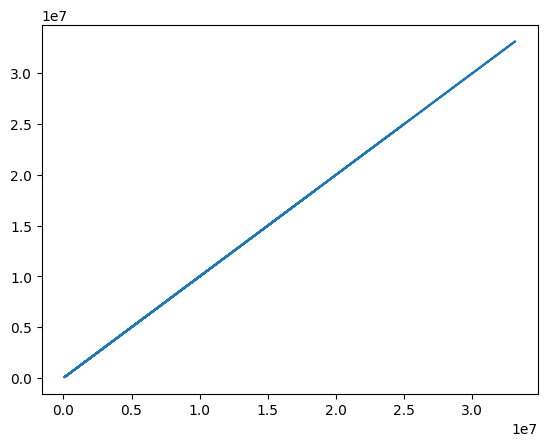

In [187]:
train_path = "data/ds4_train.csv"
valid_path = "data/ds4_valid.csv"

x_train,y_train = util.load_dataset(train_path,label_col = "y",add_intercept = True)
x_valid,y_valid = util.load_dataset(valid_path,label_col = "y",add_intercept = True)

model = PoissonRegression()
model.fit(x_train,y_train)
pred = model.predict(x_valid)

plt.figure()
plt.plot(y_valid,pred)
#plt.plot(x_train, y_train, 'bo')
#plt.plot(x_train, pred, 'go')
